In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm




In [2]:
heart_data = pd.read_csv("./dataset/heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

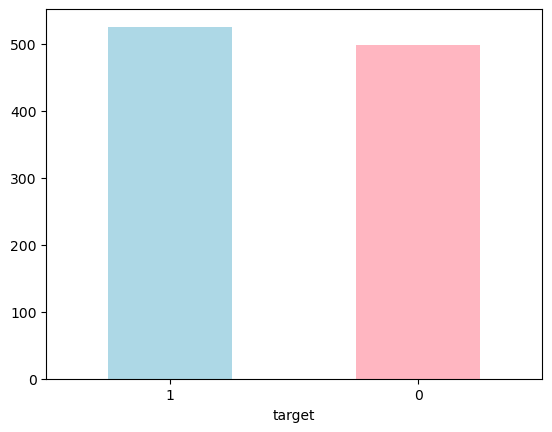

In [9]:
heart_data['target'].value_counts().plot(kind="bar",color=["lightblue","lightpink"])
plt.xticks(rotation=0);


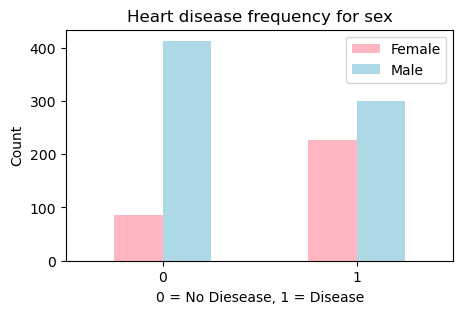

In [10]:
pd.crosstab(heart_data.target,heart_data.sex).plot(kind="bar",color=["lightpink","lightblue"],figsize=(5,3))
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

>Thalach coloumn represents Maximum heart rate

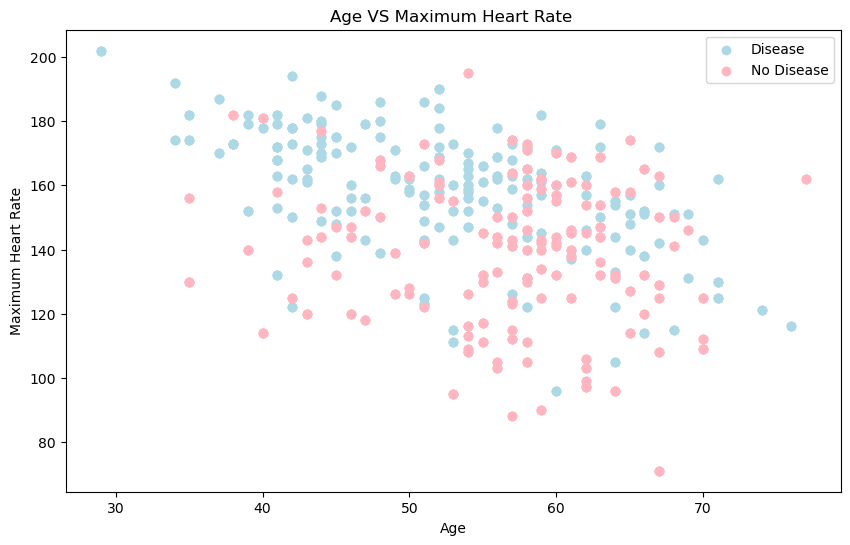

In [11]:
# Max Heart Rate of People with heart disease
plt.figure(figsize=(10, 6))
plt.scatter(heart_data.age[heart_data.target==1],
            heart_data.thalach[heart_data.target==1],color="lightblue",label="Disease")

# Max Heart Rate of People with no heart disease
plt.scatter(heart_data.age[heart_data.target==0],
            heart_data.thalach[heart_data.target==0],color="lightpink",label="No Disease")
plt.title("Age VS Maximum Heart Rate ")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend();


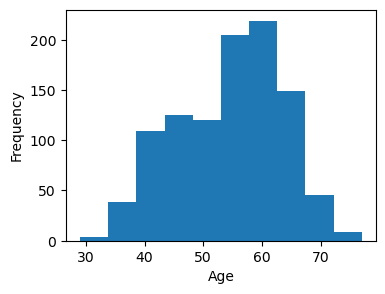

In [12]:
# Checking the distribution of Age coloumn in the data set

plt.figure(figsize=(4,3));
heart_data.age.plot.hist();
plt.xlabel("Age")
plt.ylabel("Frequency");


In [13]:
#Assigning Feature and Target Variables
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

#Splitting the data set
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y)

# We will be trying 3 different Machine Learning Models

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Support Vector Machine

In [14]:
# Using a Dictionary 
models = {
          "Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "SVM":svm.SVC(kernel='linear')
         }


In [15]:
#Function for training all models and getting model scores
def fitandscore(models,x_train,y_train,x_test,y_test):
    
    
    dict_score={}
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        dict_score[name]=model.score(x_test,y_test)
        
    return dict_score 
     

In [16]:
#accuracy scores of these models
model_scores=fitandscore(models,x_train,y_train,x_test,y_test)
model_scores

C:\Users\amits\Desktop\FINAL1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8097560975609757,
 'KNN': 0.7317073170731707,
 'SVM': 0.8097560975609757}

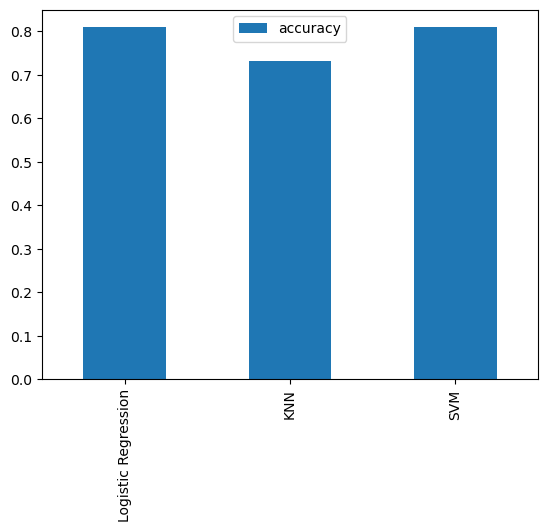

In [17]:
#Comparing models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [18]:
#Saving THE Logistic Regression model with highest test accuracy
import pickle

In [19]:
filename = 'heart_model.sav'
pickle.dump(models["Logistic Regression"], open(filename, 'wb'))

In [20]:
# loading the saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))

In [21]:
#CHECKING FOR AN INPUT 
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data_numpy_array=np.asarray(input_data)

input_reshaped=input_data_numpy_array.reshape(1,-1)
ans=models["Logistic Regression"].predict(input_reshaped)

C:\Users\amits\Desktop\FINAL1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
if ans[0]==1:
   print("This person has Heart Disease")
else:
   print("This person does not have Heart Disease")

This person has Heart Disease
